In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# checking the correct filepath of my folder

import os
file_path = "/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr"
print(os.path.exists(file_path))

True


In [5]:
# downloading all the csv files of my dataset

import glob
glob.glob("/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/*csv")

['/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/XRX_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/GS_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/SPGI_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/MTB_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/V_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/CTAS_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/ESRX_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/APH_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/BBT_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/RHI_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/GGP_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/HCA_data.csv',
 '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/HD_data.csv',


In [6]:
# checking the number of csv files
print(len(glob.glob("/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/*csv")))

505


In [10]:
company_list = [
    '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/AAPL_data.csv',
    '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/GOOG_data.csv',
    '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/AMZN_data.csv',
    '/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/MSFT_data.csv'
]

In [12]:
# concatenate the five companies data into one dataframe

data_frames = [pd.read_csv(file) for file in company_list]
combined_data = pd.concat(data_frames, ignore_index=True)

# Display the combined data
print(combined_data)
    

            date     open     high      low    close     volume  Name
0     2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1     2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2     2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3     2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4     2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
...          ...      ...      ...      ...      ...        ...   ...
4747  2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT
4748  2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT
4749  2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT
4750  2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT
4751  2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT

[4752 rows x 7 columns]


In [14]:
combined_data['Name'].unique()

array(['AAPL', 'GOOG', 'AMZN', 'MSFT'], dtype=object)

In [16]:
# checking if there is any null rows
combined_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [18]:
# checking the data types of the column names for adjustment 
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 260.0+ KB


In [20]:
# converting the date object type into date type
combined_data['date'] = pd.to_datetime(combined_data['date'])

In [22]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4752 non-null   datetime64[ns]
 1   open    4752 non-null   float64       
 2   high    4752 non-null   float64       
 3   low     4752 non-null   float64       
 4   close   4752 non-null   float64       
 5   volume  4752 non-null   int64         
 6   Name    4752 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 260.0+ KB


In [24]:
tech_list = combined_data['Name'].unique()
tech_list

array(['AAPL', 'GOOG', 'AMZN', 'MSFT'], dtype=object)

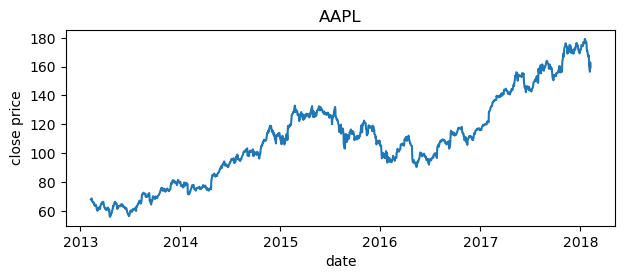

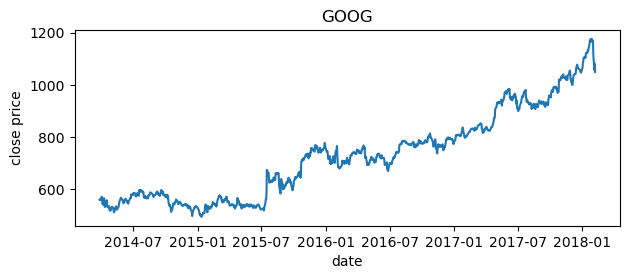

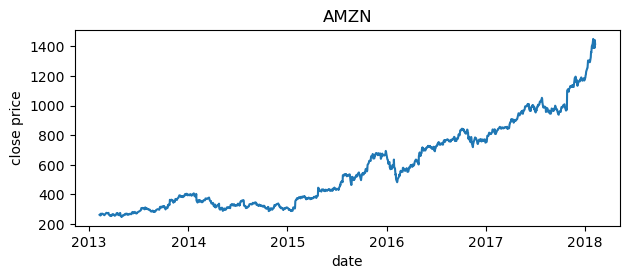

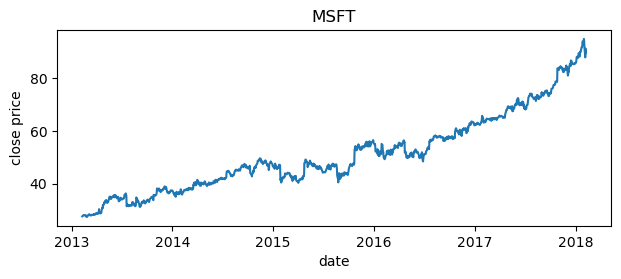

In [26]:
# creating subplots for the companies closing price over a 5 year period

for index, company in enumerate(tech_list,1):
    plt.figure(figsize=(12,5))
    plt.subplot(2, 2, index)
    filter1 = combined_data['Name'] == company
    df = combined_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.xlabel('date')
    plt.ylabel('close price')
    plt.title(company)
    plt.tight_layout()
    plt.show()

In [28]:
new_data = combined_data.copy()

arr = [10,20,50]
for window in arr:
    new_data['close_' + str(window)] = new_data['close'].rolling(window).mean()
    print(combined_data)

           date     open     high      low    close     volume  Name
0    2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1    2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2    2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3    2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4    2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
...         ...      ...      ...      ...      ...        ...   ...
4747 2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT
4748 2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT
4749 2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT
4750 2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT
4751 2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT

[4752 rows x 7 columns]
           date     open     high      low    close     volume  Name
0    2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1    2013

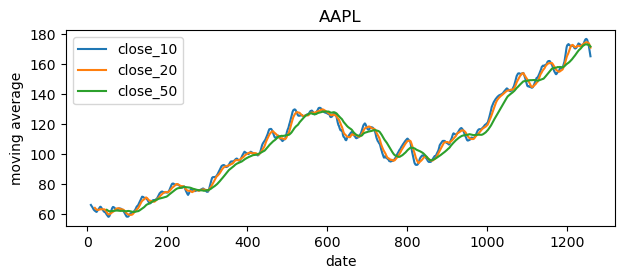

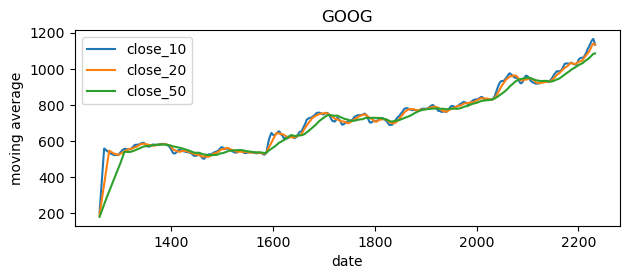

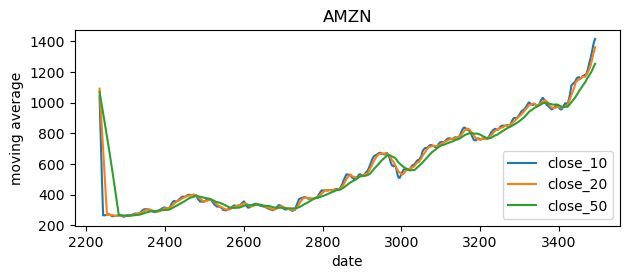

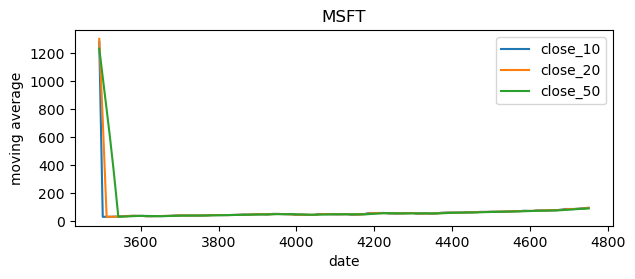

In [30]:
# analysing moving average of the various stocks over 10/20/50 days window

for index, company in enumerate(tech_list,1):
    
    plt.figure(figsize=(12,5))
    plt.subplot(2, 2, index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.xlabel('date')
    plt.ylabel('moving average')
    plt.title(company)
    plt.tight_layout()
    plt.show()

In [32]:
apple = pd.read_csv('/Users/samy/Downloads/S%26P_resources/individual_stocks_5yr/AAPL_data.csv')
apple

date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]

In [34]:
# analysing daily return percentage change for the Apple stock from 2013 to 2018

apple['Daily Return in %'] = apple['close'].pct_change() * 100
apple

date      open      high       low     close     volume  Name  \
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL   
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL   
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL   
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL   
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL   
...          ...       ...       ...       ...       ...        ...   ...   
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

      Daily Return in %  
0                   NaN  
1              1.042235  
2             -2.506658  
3             -0.190297  
4             -0.089934  
...                 ...  
1254           0.209043  
1255          -4.339015  
1256          -2.498442  
1257           4.179181  
1258          -2.140710  

[1259 rows x 8 columns]

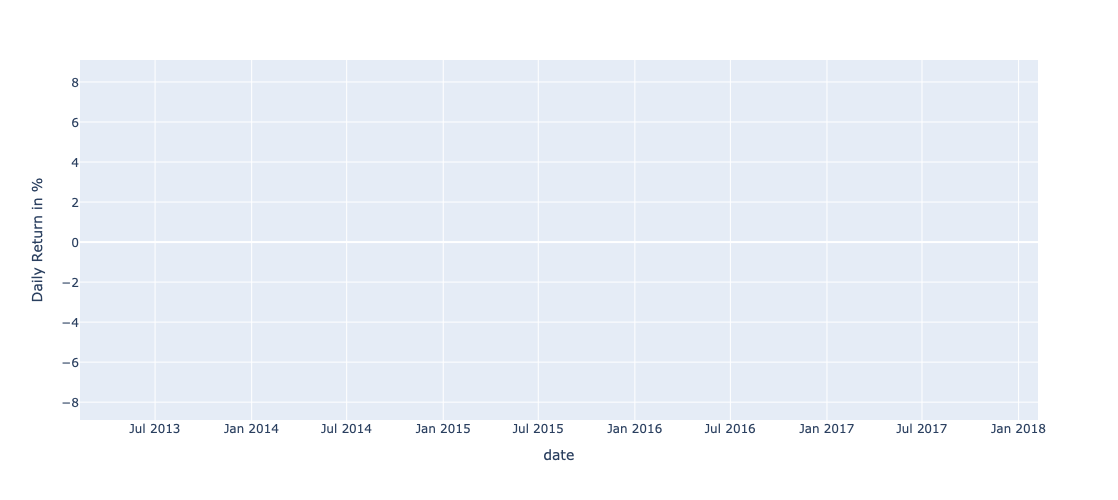

In [36]:
import plotly.express as px
fig = px.line(apple, x='date', y = 'Daily Return in %')
fig.update_layout(width=800, height=500)


In [37]:
apple.dtypes

date                  object
open                 float64
high                 float64
low                  float64
close                float64
volume                 int64
Name                  object
Daily Return in %    float64
dtype: object

In [38]:
# conerting the date type from object to datetime
apple['date'] = pd.to_datetime(apple['date'])
apple.dtypes

date                 datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
Name                         object
Daily Return in %           float64
dtype: object

In [42]:
apple

date      open      high       low     close     volume  Name  \
0    2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL   
1    2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL   
2    2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL   
3    2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL   
4    2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL   
...         ...       ...       ...       ...       ...        ...   ...   
1254 2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
1255 2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
1256 2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
1257 2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
1258 2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

      Daily Return in %  
0                   NaN  
1              1.042235  
2             -2.506658  
3             -0.190297  
4             -0.089934  
...                 ...  
1254           0.209043  
1255          -4.339015  
1256          -2.498442  
1257           4.179181  
1258          -2.140710  

[1259 rows x 8 columns]

In [44]:
apple.set_index('date',inplace=True)

<Axes: xlabel='date'>

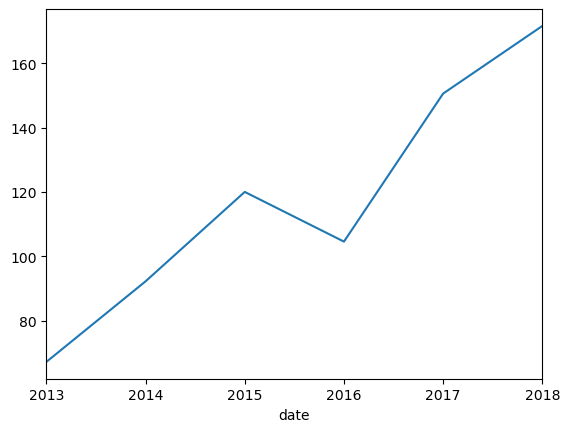

In [46]:
# performing a yearly resampling analysis for the Apple stock
apple['close'].resample('YE').mean().plot()

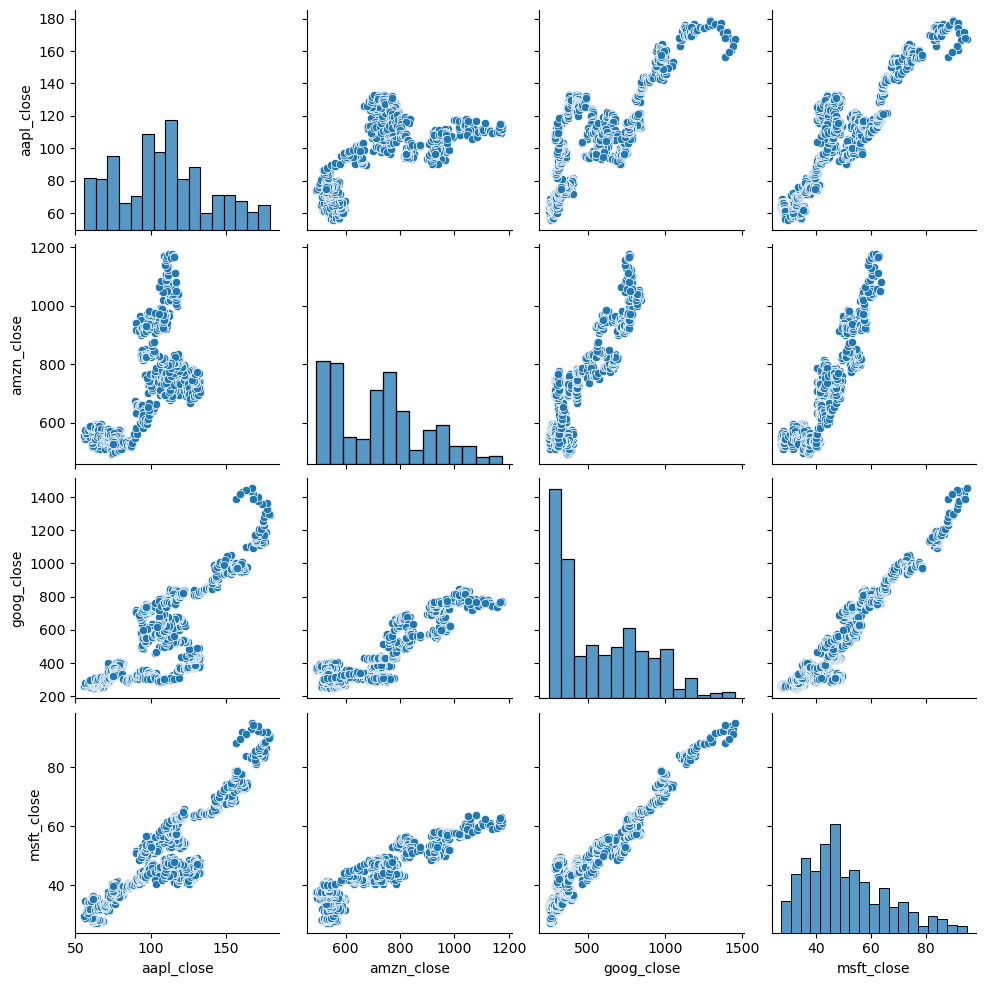

In [48]:
# Checking if the closing price of the four tech companies are correlated or not
closing_price = pd.DataFrame()

aapl = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
goog = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

closing_price['aapl_close'] = aapl['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = goog['close']
closing_price['msft_close'] = msft['close']
closing_price

sns.pairplot(closing_price)

In [49]:
# performing multivariate analysis to understand correlations between the stocks
closing_price.corr()

aapl_close  amzn_close  goog_close  msft_close
aapl_close    1.000000    0.640522    0.819078    0.899689
amzn_close    0.640522    1.000000    0.888456    0.907011
goog_close    0.819078    0.888456    1.000000    0.955977
msft_close    0.899689    0.907011    0.955977    1.000000

<Axes: >

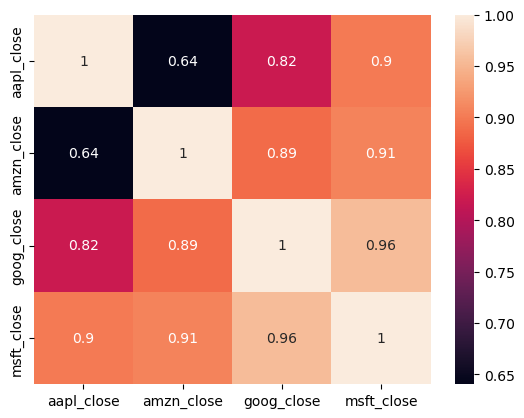

In [50]:
sns.heatmap(closing_price.corr(), annot=True)

In [51]:
closing_price

aapl_close  amzn_close  goog_close  msft_close
0        67.8542      558.46      261.95       27.55
1        68.5614      559.99      257.21       27.86
2        66.8428      556.97      258.70       27.88
3        66.7156      567.16      269.47       28.03
4        66.6556      567.00      269.24       28.04
...          ...         ...         ...         ...
1254    167.7800         NaN     1390.00       94.26
1255    160.5000         NaN     1429.95       91.78
1256    156.4900         NaN     1390.00       88.00
1257    163.0300         NaN     1442.84       91.33
1258    159.5400         NaN     1416.78       89.61

[1259 rows x 4 columns]

In [61]:
for col in closing_price.columns:
    closing_price[col+'_pct_change'] = (closing_price[col]/closing_price[col].shift(1)) - 1

closing_price

aapl_close  amzn_close  goog_close  msft_close  aapl_close_pct_change  \
0        67.8542      558.46      261.95       27.55                    NaN   
1        68.5614      559.99      257.21       27.86               0.010422   
2        66.8428      556.97      258.70       27.88              -0.025067   
3        66.7156      567.16      269.47       28.03              -0.001903   
4        66.6556      567.00      269.24       28.04              -0.000899   
...          ...         ...         ...         ...                    ...   
1254    167.7800         NaN     1390.00       94.26               0.002090   
1255    160.5000         NaN     1429.95       91.78              -0.043390   
1256    156.4900         NaN     1390.00       88.00              -0.024984   
1257    163.0300         NaN     1442.84       91.33               0.041792   
1258    159.5400         NaN     1416.78       89.61              -0.021407   

      amzn_close_pct_change  goog_close_pct_change  msft_close_pct_change  
0                       NaN                    NaN                    NaN  
1                  0.002740              -0.018095               0.011252  
2                 -0.005393               0.005793               0.000718  
3                  0.018295               0.041631               0.005380  
4                 -0.000282              -0.000854               0.000357  
...                     ...                    ...                    ...  
1254                    NaN              -0.041967              -0.007894  
1255                    NaN               0.028741              -0.026310  
1256                    NaN              -0.027938              -0.041185  
1257                    NaN               0.038014               0.037841  
1258                    NaN              -0.018062              -0.018833  

[1259 rows x 8 columns]

In [65]:
pct_change_data = closing_price[['aapl_close_pct_change','amzn_close_pct_change','goog_close_pct_change','msft_close_pct_change']]
pct_change_data

aapl_close_pct_change  amzn_close_pct_change  goog_close_pct_change  \
0                       NaN                    NaN                    NaN   
1                  0.010422               0.002740              -0.018095   
2                 -0.025067              -0.005393               0.005793   
3                 -0.001903               0.018295               0.041631   
4                 -0.000899              -0.000282              -0.000854   
...                     ...                    ...                    ...   
1254               0.002090                    NaN              -0.041967   
1255              -0.043390                    NaN               0.028741   
1256              -0.024984                    NaN              -0.027938   
1257               0.041792                    NaN               0.038014   
1258              -0.021407                    NaN              -0.018062   

      msft_close_pct_change  
0                       NaN  
1                  0.011252  
2                  0.000718  
3                  0.005380  
4                  0.000357  
...                     ...  
1254              -0.007894  
1255              -0.026310  
1256              -0.041185  
1257               0.037841  
1258              -0.018833  

[1259 rows x 4 columns]

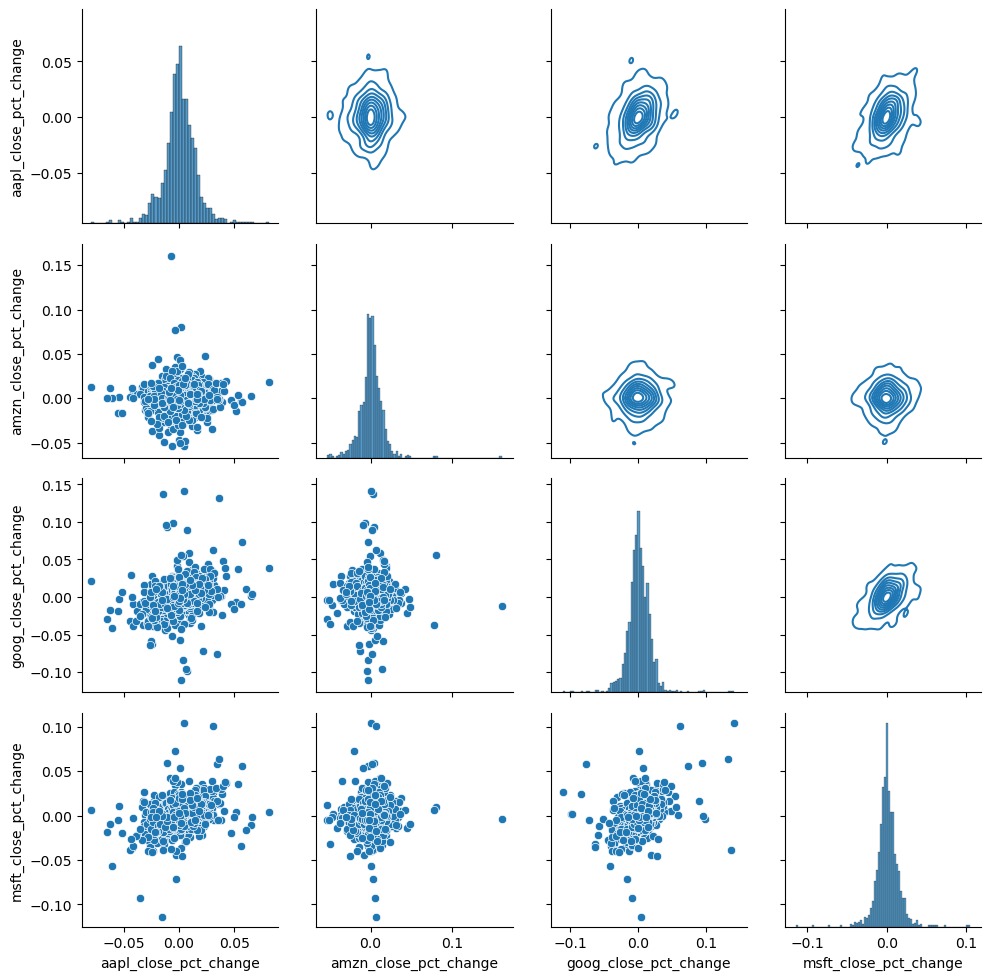

In [73]:
graph = sns.PairGrid(data=pct_change_data)
graph.map_diag(sns.histplot)
graph.map_lower(sns.scatterplot)
graph.map_upper(sns.kdeplot)
